# Assignment 2

In [73]:
# read neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

### Customer database
Given is a table *orders* with product orders, and a table *customers* with customer info. Merge the two tables together such that the remaining table only has orders for which customer info is available. Assign the final table to the variable *sales*.

In [74]:
orders = pd.DataFrame({'OrderID' : [1, 2, 3, 4, 5, 6, 7],
                       'CustID' : [1, 4, 3, 4, 1, 4, 5], 
                       'Amount' : [23.20, 2.30, 12.93, 54.92, 6.12, 9.60, 70.56]})

customers = pd.DataFrame({'ID' : [1, 2, 3, 4, 6], 
                          'First' : ["Henk", "Petra", "Sjoerd", "Mieke", "Sandjai"], 
                          'Last' : ["Janssen", "de Klomp", "Vermeulen", "Sterk", "Bhulai"],
                          'City' : ["Amsterdam", "Nijmegen", "Maastricht", "Amsterdam", "Diemen"]})

# YOUR CODE HERE

customers2 = customers.set_index(['ID'])

sales = orders.join(customers2, on='CustID')


# YOUR CODE ENDS HERE

In [75]:
display(sales)

,OrderID,CustID,Amount,First,Last,City
0,1,1,23.20,Henk,Janssen,Amsterdam
1,2,4,2.30,Mieke,Sterk,Amsterdam
2,3,3,12.93,Sjoerd,Vermeulen,Maastricht
3,4,4,54.92,Mieke,Sterk,Amsterdam
4,5,1,6.12,Henk,Janssen,Amsterdam
5,6,4,9.60,Mieke,Sterk,Amsterdam
6,7,5,70.56,NaN,NaN,NaN


The customer ID of "Sandjai Bhulai" is wrong. It should be 5 instead of 6. Correct the ID and calculate the sum of the sales values for each city. Assign the resulting table with only the total amount of sales to the variable *sales_per_city*.

In [76]:
# YOUR CODE HERE

customers.iloc[4,0] = 5
customers2 = customers.set_index(['ID'])
sales2 = orders.join(customers2, on='CustID')
sales2

city_values = sales2['Amount'].groupby(sales2['City'])
sales_per_city = city_values.sum()

# YOUR CODE ENDS HERE

In [77]:
print(sales_per_city)

City
Amsterdam     96.14
Diemen        70.56
Maastricht    12.93
Name: Amount, dtype: float64


From the *sales* dataframe, create a new dataframe with as first column the first name (*First*) and the second column the sales amount (*Amount*). Assign this to the variable *new_sales*. Then calculate the total sales amount per person and assign that to the variable *person*. Create a bar plot of the resulting dataframe.

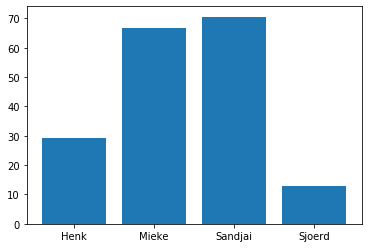

In [78]:
# YOUR CODE HERE

new_sales = sales2.filter(['First','Amount'], axis=1)
new_sales

sales_per_person = new_sales['Amount'].groupby(new_sales['First'])

person = sales_per_person.sum()
person

y_pos = np.arange(len(sales_per_person))
bars = ('Henk', 'Mieke', 'Sandjai', 'Sjoerd')
plt.bar(y_pos, person)
plt.xticks(y_pos, bars)
plt.show()


# YOUR CODE ENDS HERE

In [79]:
display(new_sales)

,First,Amount
0,Henk,23.20
1,Mieke,2.30
2,Sjoerd,12.93
3,Mieke,54.92
4,Henk,6.12
5,Mieke,9.60
6,Sandjai,70.56


### Course grades
The text that is listed below misses a separator between the courses and the grades. Create a regular expression to extract all the grades from the text and assign that value to the variable *avg_grade*. Note that you may have to cast the numbers (that are represented as strings) to floating point numbers.

In [80]:
import re
text = """Data_wrangling8.5
Machine_learning9.0
Advanced_machine_learning8.0
Reinforcement_learning7.5
"""

# YOUR CODE HERE

a = re.findall(r'\d+\.\d+', text)
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# YOUR CODE ENDS HERE

regex = re.compile(pattern, flags=re.IGNORECASE)
result = regex.findall(text)


# YOUR CODE HERE

grades_sum = sum(map(float,a))
avg_grade = grades_sum / len(a)


# YOUR CODE ENDS HERE

In [81]:
print(avg_grade)

8.25


### E-mail
Consider the following excerpt from an email. Write a regular expression that extracts the sender, recipient and the subject from the email.

In [82]:
import re
text = """From: Sandjai
To: the students following data wrangling
Subject: well done!
Body: I congratulate you all with mastering regular expressions.
It is a tough subject to learn. Good job.
"""

# YOUR CODE HERE
groups = re.split(': |\n',text)
groups

pattern = r'From: (.+)\s*To: (.+)\s*Body: (.+)\s*'
#pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
pattern = r'From: (.+)\s*To: (.+)\s*Body: (.+)\s*'



groups



# YOUR CODE ENDS HERE

regex = re.compile(pattern, flags=re.IGNORECASE)
result = regex.match(text).groups()

AttributeError: 'NoneType' object has no attribute 'groups'

In [83]:
print('{} says "{}" to {}'.format(result[0], result[2], result[1]))

IndexError: list index out of range

### Orange juice
The file below contains sales data on three brands of orange juice over different weeks over different stores. Find out which store number has the highest and lowest mean income (using the variable *INCOME*). Assign the store numbers to the variables *max_store* and *min_store*, respectively.


In [84]:
oj = pd.read_csv('oj.csv')

# YOUR CODE HERE
#store_income = oj['INCOME'].groupby(oj['store']).mean().reset_index().set_index('store')
store_income = oj['INCOME'].groupby(oj['store']).mean().reset_index()
store_income

maxi_store = store_income.loc[store_income['INCOME'].idxmax()]
mini_store = store_income.loc[store_income['INCOME'].idxmin()]

max_store = int(maxi_store['store'])
min_store = int(mini_store['store'])
store_income

# YOUR CODE ENDS HERE

,store,INCOME
0,2,10.553205
1,5,10.922371
2,8,10.597010
3,9,10.787152
4,12,9.996659
...,...,...
78,130,9.966650
79,131,10.793537
80,132,10.619154
81,134,10.722518


In [85]:
print("Store number of highest mean income: {}".format(max_store))
print("Store number of lowest mean income : {}".format(min_store))

Store number of highest mean income: 62
Store number of lowest mean income : 75


Create a dataframe with two rows (one for the best store *max_store*, and one for the worst store *min_store*). The columns are the weeks *week* of the orange juice dataset. The values in the dataframe are the sum of the sales (*logmove*) of all three brands. Assign the dataframe to the variable *store_sales*. Then create a plot of the sales with on the x-axis the weeks, and on the y-axis the sum of the sales (the sum of the *logmove*).

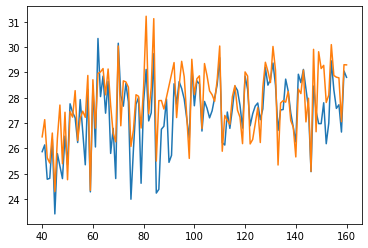

In [86]:
# YOUR CODE HERE
oj = pd.read_csv('oj.csv')

storemax_sales = oj.loc[oj['store']==int(maxi_store['store'])]  #with code from previous question activated
storemax_sales

#STORE_MAX_LOGMOVES FROM TROPICANA
storemax_tropicana_data = storemax_sales.loc[storemax_sales['brand']=='tropicana']
storemax_tropicana_logs = storemax_tropicana_data['logmove'].reset_index()
storemax_tropicana_logs

#STOREMAX_LOGMOVES FROM MINUTE_MAID
storemax_minutemaid_data = storemax_sales.loc[storemax_sales['brand']=='minute.maid']
storemax_minutemaid_logs = storemax_minutemaid_data['logmove'].reset_index()
storemax_minutemaid_logs

#STOREMAX_LOGMOVES FROM DOMINICKS
storemax_dominicks_data = storemax_sales.loc[storemax_sales['brand']=='dominicks']
storemax_dominicks_logs = storemax_dominicks_data['logmove'].reset_index()
storemax_dominicks_logs

#STOREMAX_SUM OF LOGMOVES
sum_of_logmoves = storemax_tropicana_logs + storemax_minutemaid_logs + storemax_dominicks_logs
weeks_max = sum_of_logmoves['logmove']


storemin_sales = oj.loc[oj['store']==int(mini_store['store'])] #with code from previous question activated
storemin_sales

#STORE_MIN_LOGMOVES FROM TROPICANA
storemin_tropicana_data = storemin_sales.loc[storemin_sales['brand']=='tropicana']
storemin_tropicana_logs = storemin_tropicana_data['logmove'].reset_index()
storemin_tropicana_logs

#STOREMIN_LOGMOVES FROM MINUTE_MAID
storemin_minutemaid_data = storemin_sales.loc[storemin_sales['brand']=='minute.maid']
storemin_minutemaid_logs = storemin_minutemaid_data['logmove'].reset_index()
storemin_minutemaid_logs

#STOREMIN_LOGMOVES FROM DOMINICKS
storemin_dominicks_data = storemin_sales.loc[storemin_sales['brand']=='dominicks']
storemin_dominicks_logs = storemin_dominicks_data['logmove'].reset_index()
storemin_dominicks_logs

#STOREMIN_SUM OF LOGMOVES
sum_of_logmoves2 = storemin_tropicana_logs + storemin_minutemaid_logs + storemin_dominicks_logs
weeks_min = sum_of_logmoves2['logmove']


#DATAFRAME_SALES
#ALL WEEKS
dataweeks = oj['week'].unique()
#sorted_weeks= np.sort(dataweeks)
#sorted_weeks

store_sales = pd.DataFrame([weeks_max,weeks_min], columns=dataweeks , index=[max_store, min_store])
store_sales

#PLOT_OF_THE_SALES
weeks = storemax_sales['week']
#sum_of_the_sales = storemax_sales['logmove']
weeks2 = storemin_sales['week']
#sum_of_the_sales2 = storemin_sales['logmove']

max_weeks = storemax_sales['week'].unique()
min_weeks = storemin_sales['week'].unique()

plt.plot(max_weeks, weeks_max)
plt.plot(min_weeks, weeks_min)


# YOUR CODE ENDS HERE

In [87]:
display(store_sales)

,40,46,47,48,50,51,52,53,54,57,...,43,44,49,55,56,96,101,102,41,45
62,29.119720,26.757236,26.878145,27.955102,25.729002,28.553553,27.743817,28.635134,28.366555,29.244589,...,29.743613,24.239298,25.452251,27.952974,26.406083,26.838147,27.586089,25.084718,27.087575,24.388505
75,28.433475,27.886575,27.893954,27.556373,27.219924,28.462502,29.438707,28.831454,27.287507,28.131749,...,28.406469,31.123335,29.390170,25.607980,29.519349,26.840124,27.048585,27.983038,31.218318,25.502114


The previous picture does not explain why the best store does better than the worst store. Let us study if the price influences the sales. Prepare a dataframe with two columns (the column *price* and the column *logmove*), with records only related to *max_store*. Assign this dataframe to variable *oj1*. Also create a table with the *price* and *logmove* with only records for store *min_store*. Assign this dataframe to variable *oj2*. 

In [88]:
import statsmodels.api as sm

# YOUR CODE HERE

#DATAFRAME MAX_STORE
max_data = storemax_sales

price_max = max_data['price']
logmove_max = max_data['logmove']
price_max
logmove_max
max_data #shows all data from max_store

oj1 = pd.DataFrame({'price' : price_max, 'logmove' : logmove_max})


#DATAFRAME MIN_STORE
min_data = storemin_sales

price_min = min_data['price']
logmove_min = min_data['logmove']
price_min
logmove_min
min_data #shows all data from min_store

oj2 = pd.DataFrame({'price' : price_min, 'logmove' : logmove_min})



# YOUR CODE ENDS HERE

fit1 = sm.OLS(oj1['logmove'], sm.add_constant(oj1['price'])).fit()
fit2 = sm.OLS(oj2['logmove'], sm.add_constant(oj2['price'])).fit()

print(fit1.params)
print(fit2.params)

const    9.153937
price   -0.014614
dtype: float64
const    10.876949
price    -0.672225
dtype: float64


/Users/stevenkraamwinkel/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [89]:
display(oj1, oj2)

,price,logmove
8373,3.87,9.373819
8374,3.87,9.368369
8375,3.87,9.570529
8376,3.87,9.400630
8377,3.87,9.329367
...,...,...
8719,2.09,7.491088
8720,1.94,7.714231
8721,1.94,8.236421
8722,1.49,10.157820


,price,logmove
11490,3.87,8.971067
11491,3.87,8.392990
11492,3.87,9.018695
11493,3.87,8.624791
11494,3.87,8.476371
...,...,...
11839,1.97,8.528331
11840,1.94,8.868413
11841,1.68,9.510741
11842,1.49,10.806571


The previous analysis explains the difference between the two stores. The best store has almost no sensitivity to the price. The worst store has a high negative sensitivity to the price. Hence, the best store can charge higher prices than the worst store.

Let us now see which brand is the most popular. Create a dataframe in with the three brands (*brand*) and the total number of the sales (sum of *logmove*). Assign the result to the variable *brand_sales*.

In [90]:
# YOUR CODE HERE

#ALL UNIQUE BRANDS
brands = oj['brand'].unique()
brands

#TOTAL SUM OF THE LOGMOVE
oj['logmove'].sum()

#TROPICANA
tropicana_table = oj.loc[oj['brand']=='tropicana']
tropicana_sales = tropicana_table['logmove'].sum()
tropicana_sales

#MINUTE.MAID
minute_maid_table = oj.loc[oj['brand']=='minute.maid']
minute_maid_sales = minute_maid_table['logmove'].sum()
minute_maid_sales

#DOMINICKS
dominicks_table = oj.loc[oj['brand']=='dominicks']
dominicks_sales = dominicks_table['logmove'].sum()
dominicks_sales

#THE THREE BRANDNAMES
brands[0]
brands[1]
brands[2]

#THREE BRANDS DATAFRAME
brand_sales = pd.DataFrame({'brand': [brands[0], brands[1], brands[2]],
                     'sum of logmove': [tropicana_sales, minute_maid_sales, dominicks_sales]})
brand_sales



# YOUR CODE ENDS HERE

,brand,sum of logmove
0,tropicana,87916.698522
1,minute.maid,88937.517267
2,dominicks,88527.943226


In [91]:
print(brand_sales)

         brand  sum of logmove
0    tropicana    87916.698522
1  minute.maid    88937.517267
2    dominicks    88527.943226


The column *feat* determines if the orange juice is on sale. Create a table with as row the different brands of orange juice (*brand*) and as columns the indicator for the sale (*feat*). The values in the table contain the mean price of the specific orange juices. Assign the value to the variable *featured*.

In [92]:
# YOUR CODE HERE

#SHOULD BE 3 rows and 2 columns
#EACH CELL CONTAINS THE MEAN PRICE OF THE ORANGE JUICES WITH THE CORRESPONDING FEATURE
oj

juice_on_sale = oj.loc[oj['feat']==1]
juice_non_sale = oj.loc[oj['feat']==0]

juices = juice_on_sale.groupby(oj['brand']).mean()
mean_prices = juices['price']
mean_prices

brands = oj['brand'].unique()

featured = pd.DataFrame({'brand': [brands[2], brands[1], brands[0]],
                         'mean price': [mean_prices[0], mean_prices[1], mean_prices[2]]})
juices['price']

# YOUR CODE ENDS HERE

brand
dominicks      1.563375
minute.maid    2.024867
tropicana      2.390817
Name: price, dtype: float64

In [93]:
display(featured)

,brand,mean price
0,dominicks,1.563375
1,minute.maid,2.024867
2,tropicana,2.390817
